In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score,confusion_matrix,roc_curve
from sklearn.model_selection import KFold
from sklearn import datasets
from sklearn.naive_bayes import CategoricalNB
import matplotlib.pyplot as plt

In [2]:
# X, y = datasets.load_breast_cancer(return_X_y=True)

X_path = r'D:\NEU Notes\EECE5644 - Intro to ML\Python\HW2\X_msrm.csv'
y_path = r'D:\NEU Notes\EECE5644 - Intro to ML\Python\HW2\y_msrm.csv'

X = np.loadtxt(X_path, delimiter=',')
y = np.loadtxt(y_path, delimiter=',')
print("Dataset has n=%d samples, each with d=%d features," % X.shape,"as well as %d labels." % y.shape[0])
print(X)

Dataset has n=8124 samples, each with d=22 features, as well as 8124 labels.
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 1. 1. 1.]
 [1. 0. 2. ... 1. 1. 2.]
 ...
 [3. 0. 0. ... 8. 5. 6.]
 [4. 1. 0. ... 4. 3. 6.]
 [0. 0. 0. ... 6. 5. 6.]]


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # Train:Test =  80:20
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=42)   # Train:Test =  1:99

print("Randomly split dataset to %d training and %d test samples" % (X_train.shape[0],X_test.shape[0]))

Randomly split dataset to 6499 training and 1625 test samples


In [4]:
alpha_val = np.linspace(2**-15, 2**5, 10000)

auc_vals = []

for a in alpha_val:
    classifier = CategoricalNB(alpha=a)
    classifier.fit(X_train, y_train)
    probs = classifier.predict_proba(X_test)
    auc_vals.append(roc_auc_score(y_test,probs[:,1]))

# print("Training classifier...",end="")
# print(" done")

In [5]:
max_auc_index = np.argmax(auc_vals)
max_auc = auc_vals[max_auc_index]
optimal_alpha = alpha_val[max_auc_index]
print("Max AUC:",max_auc)
print("Optimal Alpha:",optimal_alpha)

Max AUC: 0.9999848306953912
Optimal Alpha: 3.0517578125e-05


In [6]:
# Classifier using optimal alpha
classifier = CategoricalNB(alpha=optimal_alpha)
classifier.fit(X_train, y_train)

CategoricalNB(alpha=3.0517578125e-05)

In [7]:
#get preditions on test set
y_pred =  classifier.predict(X_test) 

acc = accuracy_score(y_test,y_pred)   #ACC = (TP + TN) / (P+N)
print("Accuracy:",acc)

f1 = f1_score(y_test,y_pred)    #F1 = 2 * TP / (2 * TP + FN + FP)
print("F1:",f1)

cm = confusion_matrix(y_test,y_pred)
print("Confusion matrix:\n",cm)

Accuracy: 0.9963076923076923
F1: 0.9964285714285714
Confusion matrix:
 [[782   0]
 [  6 837]]


(1625, 2)
AUC: 0.9999848306953912


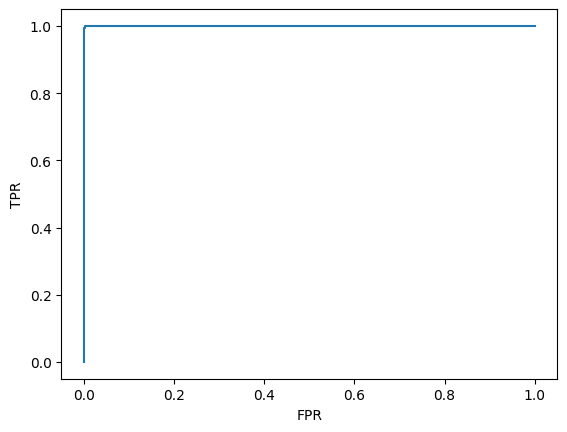

In [8]:
#get prob scores (discriminant function values of each class)
probs = classifier.predict_proba(X_test)

print(probs.shape)

fpr,tpr,thresholds = roc_curve(y_test,probs[:,1])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(fpr,tpr)
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
fig.savefig("ROC.pdf", bbox_inches="tight")

auc = roc_auc_score(y_test,probs[:,1])
print("AUC:",auc)